In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
print(tf.VERSION)
print(tf.keras.__version__)

/home/david/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0
2.1.6-tf


In [2]:
from string import punctuation
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import skipgrams
import itertools

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

In [3]:
#Preprocessing Part O
wpt = nltk.WordPunctTokenizer()
programming_stop_words = open('libest/'+'language_stop_words.txt', encoding='utf-8').read().split()
stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + programming_stop_words
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [4]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
#Preprocessing Part I
remove_terms = punctuation + '0123456789'

In [6]:
# Corpus Generation
corpora_dict_source = {}
corpora_dict_target = {}

In [7]:
#Corpora Dictionary Source
directory = os.fsencode('libest/requirements')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"): 
        #print(filename)
        doc = open('libest/requirements/'+filename, encoding='utf-8').read().split()
        corpora_dict_source[filename] = doc
    else:
        continue

In [8]:
#Corpora Dictionary Target
directory = os.fsencode('libest/source_code')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".c") or filename.endswith(".h"): 
        #print(filename)
        doc = open('libest/source_code/'+filename, encoding='utf-8').read().split()
        corpora_dict_target[filename] = doc
    else:
        continue

In [9]:
ground_dict = {}

In [10]:
#Create the Ground Truth
with open('libest/req_to_code_ground.txt', encoding='utf-8') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [y.split(' ') for y in [x.strip() for x in content]]

In [11]:
for i in content:
    for j in i[1:]:
        ground_dict[(i[0],j)]=[1,0]

In [12]:
ground_dict

{('RQ11.txt', 'est_client.c'): [1, 0],
 ('RQ11.txt', 'est_locl.h'): [1, 0],
 ('RQ11.txt', 'est_proxy.c'): [1, 0],
 ('RQ11.txt', 'est_server.c'): [1, 0],
 ('RQ13.txt', 'est.c'): [1, 0],
 ('RQ13.txt', 'est_client.c'): [1, 0],
 ('RQ13.txt', 'est_client_http.c'): [1, 0],
 ('RQ13.txt', 'est_locl.h'): [1, 0],
 ('RQ13.txt', 'est_proxy.c'): [1, 0],
 ('RQ13.txt', 'est_server.c'): [1, 0],
 ('RQ13.txt', 'est_server.h'): [1, 0],
 ('RQ14.txt', 'est_server.c'): [1, 0],
 ('RQ15.txt', 'est_locl.h'): [1, 0],
 ('RQ15.txt', 'est_proxy.c'): [1, 0],
 ('RQ15.txt', 'est_server.c'): [1, 0],
 ('RQ15.txt', 'est_server_http.c'): [1, 0],
 ('RQ16.txt', 'est.c'): [1, 0],
 ('RQ16.txt', 'est_client.c'): [1, 0],
 ('RQ16.txt', 'est_client_http.c'): [1, 0],
 ('RQ16.txt', 'est_locl.h'): [1, 0],
 ('RQ16.txt', 'est_proxy.c'): [1, 0],
 ('RQ16.txt', 'est_server.c'): [1, 0],
 ('RQ16.txt', 'est_server_http.c'): [1, 0],
 ('RQ16.txt', 'est_server_http.h'): [1, 0],
 ('RQ17.txt', 'est_client.c'): [1, 0],
 ('RQ17.txt', 'est_locl.h'

In [13]:
#Cartesian Product, dataset generation
p_dataset = []
for i in itertools.product(list(corpora_dict_source.keys()),list(corpora_dict_target.keys())):
    p_dataset.append(i)

In [14]:
dataset = {}
true_keys = set(ground_dict.keys())
for element in p_dataset:
    if element in true_keys:
        dataset[element] = [1.0, 0.0] #if true then link
    else:
        dataset[element] = [0.0, 1.0] #if false then non-link

In [15]:
dataset

{('RQ1.txt', 'est.c'): [0.0, 1.0],
 ('RQ1.txt', 'est.h'): [0.0, 1.0],
 ('RQ1.txt', 'est_client.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_client_http.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_client_proxy.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_client_proxy.h'): [0.0, 1.0],
 ('RQ1.txt', 'est_locl.h'): [0.0, 1.0],
 ('RQ1.txt', 'est_ossl_util.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_ossl_util.h'): [0.0, 1.0],
 ('RQ1.txt', 'est_proxy.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_server.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_server.h'): [0.0, 1.0],
 ('RQ1.txt', 'est_server_http.c'): [0.0, 1.0],
 ('RQ1.txt', 'est_server_http.h'): [0.0, 1.0],
 ('RQ10.txt', 'est.c'): [0.0, 1.0],
 ('RQ10.txt', 'est.h'): [0.0, 1.0],
 ('RQ10.txt', 'est_client.c'): [0.0, 1.0],
 ('RQ10.txt', 'est_client_http.c'): [0.0, 1.0],
 ('RQ10.txt', 'est_client_proxy.c'): [0.0, 1.0],
 ('RQ10.txt', 'est_client_proxy.h'): [0.0, 1.0],
 ('RQ10.txt', 'est_locl.h'): [0.0, 1.0],
 ('RQ10.txt', 'est_ossl_util.c'): [0.0, 1.0],
 ('RQ10.txt', 'est_ossl_util.h'): [0.0, 1.0],
 (

In [16]:
corpora_dict_target.values()

dict_values([['/**', '@file', '*/', '/*------------------------------------------------------------------', '*', 'est/est.h', '-', 'Public', 'API', 'for', 'Enrollment', 'over', 'Secure', 'Transport', '*', '*', 'November,', '2012', '*', '*', 'Copyright', '(c)', '2012-2014,', '2016,', '2017', 'by', 'cisco', 'Systems,', 'Inc.', '*', 'All', 'rights', 'reserved.', '**------------------------------------------------------------------', '*/', '#ifndef', 'HEADER_EST_H', '#define', 'HEADER_EST_H', '#ifdef', 'WIN32', '#ifdef', 'LIBEST_EXPORTS', '#define', 'LIBEST_API', '__declspec(dllexport)', '#else', '#define', 'LIBEST_API', '__declspec(dllimport)', '#endif', '#else', '#define', 'LIBEST_API', '#endif', '#include', '<openssl/ssl.h>', '#include', '<openssl/engine.h>', '#include', '<openssl/conf.h>', '#include', '<openssl/srp.h>', '#ifdef', '__cplusplus', 'extern', '"C"', '{', '#endif', '/*', '*', 'Allow', 'for', 'runtime', 'checking', 'of', 'the', 'path', 'segment', 'support', '*/', '#ifdef', 'H

In [17]:
corpora_dict_source.values()

dict_values([['REQUIREMENT', '18:', 'HTTP-BASED', 'CLIENT', 'AUTHENTICATION', 'The', 'EST', 'server', 'MAY', 'request', 'HTTP-based', 'client', 'authentication.', 'This', 'request', 'can', 'be', 'in', 'addition', 'to', 'successful', 'TLS', 'client', 'authentication', '(Section', '3.3.2)', 'if', 'EST', 'server', 'policy', 'requires', 'additional', 'authentication.', '(For', 'example,', 'the', 'EST', 'server', 'may', 'require', 'that', 'an', 'EST', 'client', '"knows"', 'a', 'password', 'in', 'addition', 'to', '"having"', 'an', 'existing', 'client', 'certificate.)', 'Or,', 'HTTP-based', 'client', 'authentication', 'can', 'be', 'an', 'EST', 'server', 'policy-specified', 'fallback', 'in', 'situations', 'where', 'the', 'EST', 'client', 'did', 'not', 'successfully', 'complete', 'the', 'TLS', 'client', 'authentication.', '(This', 'might', 'arise', 'if', 'the', 'EST', 'client', 'is', 'enrolling', 'for', 'the', 'first', 'time', 'or', 'if', 'the', 'certificates', 'available', 'to', 'an', 'EST', '

In [18]:
#Preprocessing Part II
norm_source = [[word.lower() for word in sent if word not in remove_terms] for sent in corpora_dict_source.values()]
norm_source = [' '.join(tok_sent) for tok_sent in norm_source]
norm_source = filter(None, normalize_corpus(norm_source))
norm_source = [tok_sent for tok_sent in norm_source if len(tok_sent.split()) > 2]

In [19]:
norm_source #Token sentence is one document

['requirement httpbased client authentication est server may request httpbased client authentication request addition successful tls client authentication section est server policy requires additional authentication example est server may require est client knows password addition existing client certificate httpbased client authentication est server policyspecified fallback situations est client successfully complete tls client authentication might arise est client enrolling first time certificates available est client cannot used tls client authentication http basic digest authentication must performed tls rfc later versions null anon cipher suites must used provide confidentiality support mutual certificatebased certificateless authentication respectively specified certificate management cms cmc transport protocols rfc server must assume client support type http authentication cookies basic authentication digest authentication clients support basic digest authentication mechanism se

In [20]:
#Preprocessing Part II
norm_target = [[word.lower() for word in sent if word not in remove_terms] for sent in corpora_dict_target.values()]
norm_target = [' '.join(tok_sent) for tok_sent in norm_target]
norm_target = filter(None, normalize_corpus(norm_target))
norm_target = [tok_sent for tok_sent in norm_target if len(tok_sent.split()) > 2]
norm_target

["file estesth api enrollment secure transport november copyright c cisco systems inc rights reserved ifndef headeresth define headeresth ifdef win ifdef libestexports define libestapi declspecdllexport define libestapi declspecdllimport endif define libestapi endif include opensslsslh include opensslengineh include opensslconfh include opensslsrph ifdef cplusplus c endif allow runtime checking path segment support ifdef haveuriparser define pathsegmentsupportenabled endif define estmaxfilelen define estmaxservernamelen ) # define est_portnum_len ( ( )) # define est_max_servername_and_port_len ( est_max_servername_len + est_portnum_len ) # define est_max_client_cert_len ( 4096 ) # define est_max_path_segment_len ( 128 ) est_server , est_client , est_proxy est_mode ; est_client_proxy_none - 1 , est_client_proxy_http_notunnel 0 , est_client_proxy_http_tunnel 1 , est_client_proxy_socks4 4 , est_client_proxy_socks5 5 , est_client_proxy_socks4a 6 , est_client_proxy_socks5_hostname 7 , est_c

In [21]:
corpora_dict_source = dict(zip(corpora_dict_source.keys(),norm_source))
corpora_dict_target = dict(zip(corpora_dict_target.keys(),norm_target))

In [22]:
len(list(corpora_dict_source.values())[0])

1626

In [23]:
#1-Build the corpus vocabulary
tokenizer_source = text.Tokenizer()
tokenizer_source.fit_on_texts(norm_source)

tokenizer_target = text.Tokenizer()
tokenizer_target.fit_on_texts(norm_target)

In [24]:
word2id_source = tokenizer_source.word_index
id2word_source = {v:k for k, v in word2id_source.items()}

word2id_target = tokenizer_target.word_index
id2word_target = {v:k for k, v in word2id_target.items()}

In [25]:
id2word_source

{1: 'est',
 2: 'client',
 3: 'server',
 4: 'rfc',
 5: 'certificate',
 6: 'section',
 7: 'tls',
 8: 'authentication',
 9: 'request',
 10: 'key',
 11: 'must',
 12: 'http',
 13: 'ca',
 14: 'used',
 15: 'response',
 16: 'use',
 17: 'certificates',
 18: 'requirement',
 19: 'ta',
 20: 'specified',
 21: 'using',
 22: 'may',
 23: 'information',
 24: 'clients',
 25: 'database',
 26: 'csr',
 27: 'attributes',
 28: '1',
 29: 'cmc',
 30: '3',
 31: 'message',
 32: 'pki',
 33: 'cipher',
 34: 'type',
 35: 'authorization',
 36: 'optional',
 37: 'enrollment',
 38: 'example',
 39: 'certificateless',
 40: 'messages',
 41: 'implicit',
 42: 'transport',
 43: 'attribute',
 44: '4',
 45: 'suite',
 46: 'operation',
 47: 'requests',
 48: 'contenttype',
 49: 'identity',
 50: 'described',
 51: 'servers',
 52: 'include',
 53: 'see',
 54: 'defined',
 55: 'security',
 56: 'value',
 57: 'issued',
 58: 'provides',
 59: 'support',
 60: 'certification',
 61: 'full',
 62: 'explicit',
 63: 'additional',
 64: 'existing',


In [26]:
id2word_target

{1: 'est',
 2: 'ctx',
 3: 'err',
 4: 'len',
 5: 'http',
 6: 'client',
 7: 'log',
 8: 'ssl',
 9: 'auth',
 10: 'server',
 11: 'null',
 12: "'",
 13: 'error',
 14: 'csr',
 15: '0',
 16: 'rv',
 17: 'cert',
 18: 'data',
 19: 'hdr',
 20: 'max',
 21: 'request',
 22: '1',
 23: 'x509',
 24: 'ca',
 25: 'free',
 26: 'proxy',
 27: 'path',
 28: 's',
 29: 'n',
 30: 'set',
 31: 'buf',
 32: 'function',
 33: 'context',
 34: 'cacerts',
 35: 'conn',
 36: 'value',
 37: 'none',
 38: 'get',
 39: 'application',
 40: 'used',
 41: 'certs',
 42: 'new',
 43: 'bio',
 44: 'param',
 45: 'pkcs7',
 46: 'invalid',
 47: 'seg',
 48: 'der',
 49: 'csrattrs',
 50: 'info',
 51: 'uri',
 52: 'header',
 53: 'mode',
 54: 'key',
 55: 'rc',
 56: 'pointer',
 57: 'req',
 58: 'read',
 59: 'tls',
 60: 'pop',
 61: 'buffer',
 62: 'length',
 63: 'certificate',
 64: 'segment',
 65: 'mg',
 66: 'token',
 67: 'string',
 68: 'store',
 69: 'name',
 70: 'failed',
 71: 'sock',
 72: 'digest',
 73: 'enroll',
 74: 'libest',
 75: 'pkcs10',
 76: 'ch

In [27]:
vocab_size_source = len(word2id_source) + 1 
vocab_size_target = len(word2id_target) + 1 
embed_size = 20 #100

In [28]:
wids_source = [[word2id_source[w] for w in text.text_to_word_sequence(doc)] for doc in norm_source]
wids_target = [[word2id_target[w] for w in text.text_to_word_sequence(doc)] for doc in norm_target]
print('Vocabulary Size Source:', vocab_size_source)
print('Vocabulary Sample Source:', list(word2id_source.items())[:10])

print('Vocabulary Size Target:', vocab_size_target)
print('Vocabulary Sample Target:', list(word2id_target.items())[:10])

Vocabulary Size Source: 1795
Vocabulary Sample Source: [('est', 1), ('client', 2), ('server', 3), ('rfc', 4), ('certificate', 5), ('section', 6), ('tls', 7), ('authentication', 8), ('request', 9), ('key', 10)]
Vocabulary Size Target: 2537
Vocabulary Sample Target: [('est', 1), ('ctx', 2), ('err', 3), ('len', 4), ('http', 5), ('client', 6), ('log', 7), ('ssl', 8), ('auth', 9), ('server', 10)]


In [29]:
#2-Build a skip-gram [(target, context), relevancy] generator
# generate skip-grams
#Window SIZE!
skip_grams_source = [skipgrams(wid, vocabulary_size=vocab_size_source, window_size=10) for wid in wids_source]
skip_grams_target = [skipgrams(wid, vocabulary_size=vocab_size_target, window_size=10) for wid in wids_target]

In [30]:
# view sample skip-grams
pairs, labels = skip_grams_target[0][0], skip_grams_target[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word_target[pairs[i][0]], pairs[i][0], 
          id2word_target[pairs[i][1]], pairs[i][1], 
          labels[i]))

(e (92), frequently (1880)) -> 0
(contains (230), stop (341)) -> 0
(client (6), estserversendhttpretryafter (1716)) -> 0
(api (83), walk (856)) -> 0
(invoking (446), event (1049)) -> 0
(call (239), ipadd (2448)) -> 0
(ca (24), follows (1736)) -> 0
(bad (97), strength (445)) -> 1
(proxy (26), est (1)) -> 1
(e (92), secrecty (2067)) -> 0


In [31]:
#3-Build the skip-gram model architecture
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dot, Input, Dense, Reshape, LSTM
from tensorflow.keras.layers import Embedding, Multiply, Subtract
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Lambda

In [32]:
#The functional API Version
#Receive 1 Integer between 1 and embed_size
word_input_source = Input(shape=(1,))
word_input_target = Input(shape=(1,))

# This embedding layer will encode the input sequence
# into a sequence of dense vocab_size-dimensional vectors.
x_word_source = Embedding(vocab_size_source, embed_size,embeddings_initializer="glorot_uniform",input_length=1)(word_input_source)
x_word_source = Reshape((embed_size, ))(x_word_source)

x_word_target = Embedding(vocab_size_target, embed_size,embeddings_initializer="glorot_uniform",input_length=1)(word_input_target)
x_word_target = Reshape((embed_size, ))(x_word_target)

context_input_source = Input(shape=(1,))
context_input_target = Input(shape=(1,))

x_context_source = Embedding(vocab_size_source, embed_size,embeddings_initializer="glorot_uniform",input_length=1)(context_input_source)
x_context_source = Reshape((embed_size, ))(x_context_source)

x_context_target = Embedding(vocab_size_target, embed_size,embeddings_initializer="glorot_uniform",input_length=1)(context_input_target)
x_context_target = Reshape((embed_size, ))(x_context_target)

x_source = Dot(axes=-1,normalize=True)([x_word_source, x_context_source])
x_source = Dense(1,kernel_initializer="glorot_uniform", activation="sigmoid")(x_source)

x_target = Dot(axes=-1,normalize=True)([x_word_target, x_context_target])
x_target = Dense(1,kernel_initializer="glorot_uniform", activation="sigmoid")(x_target)

In [33]:
#Defining The model
model_source = Model(inputs=[word_input_source,context_input_source], outputs=[x_source])
model_target = Model(inputs=[word_input_target,context_input_target], outputs=[x_target])

In [34]:
#Model Compiling
model_source.compile(loss="mean_squared_error", optimizer="rmsprop")
model_target.compile(loss="mean_squared_error", optimizer="rmsprop")

In [35]:
# view model summary
print(model_source.summary())
print(model_target.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 20)        35900       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 20)        35900       input_3[0][0]                    
__________________________________________________________________________________________________
reshape (R

In [36]:
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.manifold import TSNE

Using TensorFlow backend.


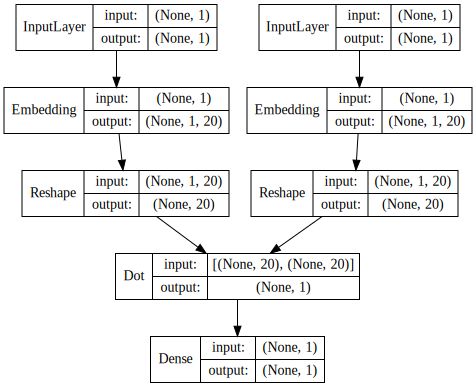

In [37]:
SVG(model_to_dot(model_source, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

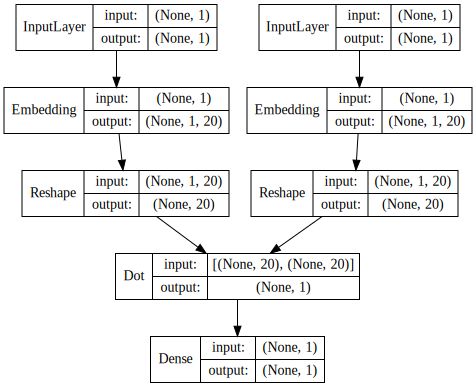

In [38]:
SVG(model_to_dot(model_target, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [39]:
#4-Training The Model 
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams_source):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed Source {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model_source.train_on_batch(X,Y)  
    print('Epoch:', epoch, 'Loss:', loss)

Processed Source 0 (skip_first, skip_second, relevance) pairs


/home/david/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch: 1 Loss: 12.977965876460075
Processed Source 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 12.76237204670906
Processed Source 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 12.365355178713799
Processed Source 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 11.9371567517519
Processed Source 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 11.540958523750305


In [40]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams_target):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed Target {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model_target.train_on_batch(X,Y)  
    print('Epoch:', epoch, 'Loss:', loss)

Processed Target 0 (skip_first, skip_second, relevance) pairs


/home/david/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch: 1 Loss: 3.535348653793335
Processed Target 0 (skip_first, skip_second, relevance) pairs
Epoch: 2 Loss: 3.1413503289222717
Processed Target 0 (skip_first, skip_second, relevance) pairs
Epoch: 3 Loss: 2.7521511763334274
Processed Target 0 (skip_first, skip_second, relevance) pairs
Epoch: 4 Loss: 2.425866946578026
Processed Target 0 (skip_first, skip_second, relevance) pairs
Epoch: 5 Loss: 2.1764436066150665


In [41]:
#5-Get Word Embeddings
#merge_layer = model.layers[2]
#word_model = merge_layer.layers[0]
#word_embed_layer = word_model.layers[0]
weights_source = model_source.layers[2].get_weights()[0][1:]
weights_target = model_target.layers[2].get_weights()[0][1:]
print(weights_source.shape)
print(weights_target.shape)

(1794, 20)
(2536, 20)


In [42]:
df_embeddings_source = pd.DataFrame(weights_source, index=id2word_source.values())
df_embeddings_target = pd.DataFrame(weights_target, index=id2word_target.values())

In [43]:
df_embeddings_source.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
est,0.005455,-0.047383,-0.047013,0.028261,-0.021350,-0.030275,-0.039439,-0.034037,-0.045502,-0.030149,0.040131,0.046021,0.015151,0.030744,0.035980,-0.034092,0.037041,0.031323,-0.038561,-0.047242
client,0.005289,-0.048543,-0.051684,0.028752,-0.024281,-0.029825,-0.041127,-0.037636,-0.045723,-0.028374,0.041689,0.048901,0.014878,0.031454,0.036566,-0.033673,0.037393,0.032093,-0.041315,-0.049397
server,0.006369,-0.049687,-0.050174,0.031511,-0.023102,-0.030930,-0.041692,-0.036800,-0.046601,-0.032453,0.043726,0.050830,0.016307,0.030790,0.040537,-0.036661,0.042286,0.033768,-0.044226,-0.051637
rfc,0.006621,-0.053595,-0.051490,0.034123,-0.025642,-0.029075,-0.047779,-0.035451,-0.046556,-0.031761,0.041587,0.050618,0.017194,0.032988,0.036061,-0.037602,0.040129,0.036619,-0.046264,-0.050009
certificate,0.005367,-0.047815,-0.050671,0.028766,-0.023535,-0.028796,-0.041860,-0.036876,-0.045349,-0.028517,0.036683,0.046593,0.014955,0.028776,0.035777,-0.034516,0.036305,0.030474,-0.039274,-0.047799


In [44]:
df_embeddings_source.T['est'][0]

0.005454709

In [45]:
df_embeddings_target.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
est,-0.030236,0.016745,-0.034084,0.027606,0.033762,-0.027420,-0.009437,-0.000690,-0.014357,-0.012260,-0.016810,0.008318,-0.027111,-0.018732,0.030207,-0.020767,0.031339,0.025233,-0.005043,-0.040404
ctx,-0.019063,-0.005770,-0.044050,0.047431,0.044618,-0.012133,-0.021049,-0.013560,-0.032439,-0.023126,-0.017551,0.007655,-0.017112,-0.017700,0.028723,-0.014619,0.036639,0.029705,0.006694,-0.056147
err,-0.032032,0.013655,-0.018615,0.023159,0.036442,-0.023830,-0.011721,-0.002799,-0.016826,-0.021322,-0.022804,0.015026,-0.025071,-0.018276,0.027828,-0.025608,0.035311,0.021820,-0.015236,-0.046196
len,-0.034256,0.021383,-0.039705,0.045737,0.040144,-0.029312,-0.004162,0.000284,-0.010226,-0.019555,-0.005617,0.021344,-0.022926,-0.021243,0.036598,-0.028386,0.037400,0.032271,-0.003623,-0.036485
http,-0.032437,0.014570,-0.032868,0.028851,0.026399,-0.028178,-0.010038,0.002214,-0.010892,-0.022211,-0.015129,0.005016,-0.024847,-0.020650,0.015970,-0.020827,0.026613,0.029835,-0.009193,-0.035969


In [46]:
df_embedding_source_trans = df_embeddings_source.T
df_embedding_target_trans = df_embeddings_target.T

In [47]:
#Traceability Architecture
hidden_nodes = 30 #60
integration_nodes = 10 #20
K=2

In [48]:
# Source Model
source_input = Input(shape=(None,embed_size))
source_LSTM = LSTM(hidden_nodes,return_state = True)
source_outputs, source_h, source_c = source_LSTM (source_input)

In [49]:
# Target Model
target_input = Input(shape=(None,embed_size))
target_LSTM = LSTM(hidden_nodes,return_state = True)
target_outputs, target_h, target_c = target_LSTM (target_input)

In [50]:
list_outputs = [source_outputs,target_outputs]
#Point-Wise Multiplication used to compare direction of source and target vectors
direction_vector = Multiply()(list_outputs)

#Absolute Vector Substraction to compare distance of src and trg vectors
def abs_subs(list_outputs):
    subs_vector = Subtract()(list_outputs)
    abs_vector = tf.keras.backend.abs(subs_vector)
    return abs_vector
distance_vector = Lambda(abs_subs)(list_outputs)

In [51]:
direction_vector

<tf.Tensor 'multiply/mul:0' shape=(?, 30) dtype=float32>

In [52]:
distance_vector

<tf.Tensor 'lambda/Abs:0' shape=(?, 30) dtype=float32>

In [53]:
#Integration Layer Sigmoid and Prediction
merged_vector = layers.concatenate([direction_vector, distance_vector], axis=-1)
integration_layer = Dense(integration_nodes, activation='sigmoid')(merged_vector)
predictions = Dense(K, activation='softmax')(integration_layer)

In [54]:
merged_vector

<tf.Tensor 'concatenate/concat:0' shape=(?, 60) dtype=float32>

In [55]:
integration_layer

<tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 10) dtype=float32>

In [56]:
predictions

<tf.Tensor 'dense_3/Softmax:0' shape=(?, 2) dtype=float32>

In [57]:
#TraceModel 
tracing_network = Model(inputs=[source_input, target_input],outputs=[predictions])

In [58]:
tracing_network.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

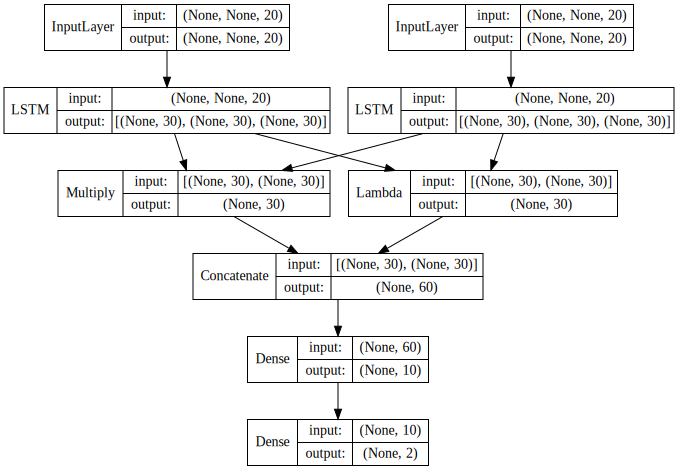

In [59]:
#Tracing Network Visualization
SVG(model_to_dot(tracing_network, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [60]:
#Corpus Generation
from tempfile import mkdtemp
import os.path as path
file_source_artifacts = path.join(mkdtemp(), 'source_artifacts.dat')
file_target_artifacts = path.join(mkdtemp(), 'target_artifacts.dat')
file_target_data = path.join(mkdtemp(), 'target_data.dat')

In [61]:
max_len_source_artifacts = max([len(doc) for doc in list(corpora_dict_source.values())])
max_len_target_artifacts = max([len(doc) for doc in list(corpora_dict_target.values())])
print(max_len_source_artifacts,max_len_target_artifacts)

4864 103875


In [62]:
print(len(corpora_dict_source),len(corpora_dict_target))

52 14


In [71]:
#nb_samples = len(dataset) < 728 elements
nb_samples = 10
nb_samples

10

In [72]:
#The embedding is done before
source_artifacts = np.memmap(filename = file_source_artifacts, dtype='float32', mode='w+', shape = (nb_samples,max_len_source_artifacts,embed_size))
target_artifacts = np.memmap(filename = file_target_artifacts, dtype='float32', mode='w+', shape = (nb_samples,max_len_target_artifacts,embed_size))
target_data = np.memmap(filename = file_target_data, dtype='float32', mode='w+', shape = (nb_samples, K))

In [73]:
# Vectorize the artifacts df_embeddings_source.T['est']
key_list = list(dataset.keys())[:nb_samples]
value_list = list(dataset.values())[:nb_samples]
vocabu_source = set(id2word_source.values())
vocabu_target = set(id2word_target.values())
print('whether' in vocabu_source)
print('.' in vocabu_source)
print(len(key_list))

True
False
10


In [74]:
for doc in range(len(key_list)): #len(key_list)
    for k,word in enumerate(corpora_dict_source[key_list[doc][0]].split(' ')):
        if word in vocabu_source:
            for vec in range(embed_size):
                source_artifacts[doc,k,vec] = df_embedding_source_trans[word][vec]
            #print(doc,k,word,df_embedding_source_trans[word][vec])
    for k,word in enumerate(corpora_dict_target[key_list[doc][1]].split(' ')):
        if word in vocabu_target:
            for vec in range(embed_size):
                target_artifacts[doc,k,vec] = df_embedding_target_trans[word][vec]        

In [75]:
source_artifacts[0]

memmap([[ 0.00368494, -0.04689156, -0.04853475, ...,  0.03188152,
         -0.0394814 , -0.04738781],
        [ 0.00658865, -0.03504615, -0.04200977, ...,  0.02605971,
         -0.03366371, -0.0446042 ],
        [ 0.00528935, -0.04854259, -0.05168441, ...,  0.03209334,
         -0.04131455, -0.04939706],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)

In [76]:
for elem in range(len(value_list)):
    target_data[elem,0] = value_list[elem][0]
    target_data[elem,1] = value_list[elem][1]

In [77]:
target_data

memmap([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.]], dtype=float32)

In [78]:
# Run training
history = tracing_network.fit(x=[source_artifacts,target_artifacts], 
          y=target_data,
          #batch_size=64,
          epochs=4, #50
          validation_split=0.2)

Train on 8 samples, validate on 2 samples
Epoch 1/4
8/8 [==============================] - 133s 17s/step - loss: 0.7361 - acc: 0.3750 - val_loss: 0.6997 - val_acc: 0.5000
Epoch 2/4
8/8 [==============================] - 116s 15s/step - loss: 0.7283 - acc: 0.3750 - val_loss: 0.6981 - val_acc: 0.5000
Epoch 3/4
8/8 [==============================] - 93s 12s/step - loss: 0.7230 - acc: 0.3750 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 4/4
8/8 [==============================] - 110s 14s/step - loss: 0.7187 - acc: 0.3750 - val_loss: 0.6961 - val_acc: 0.5000


In [79]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


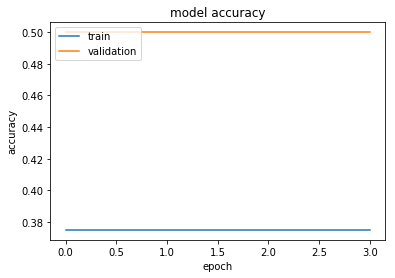

In [80]:
####Ploting Accuracy
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

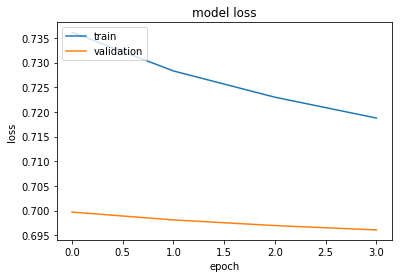

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print(tracing_network.summary())

In [ ]:
# Save model
tracing_network.save('tracing_network.h5')

In [ ]:
# load model
from tensorflow.keras.models import load_model
model = load_model('tracing_network.h5')

In [ ]:
####Verifying Closeness and Visualization
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['request', 'authentication', 'certificate', 'est','server','enrollment','ca']}

similar_words

In [ ]:
words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')